[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM.git/master?filepath=PySDM_examples/Shipway_and_Hill_2012/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM/blob/master/PySDM_examples/Shipway_and_Hill_2012/demo.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

In [1]:
from PySDM_examples.Shipway_and_Hill_2012 import Settings, Simulation
from PySDM.physics import si
from matplotlib import pyplot
from PySDM_examples.utils.show_plot import show_plot
import numpy as np

In [2]:
settings = Settings(n_sd=100, w_1=2*si.m/si.s, dt=25*si.s, dz=100*si.m)
simulation = Simulation(settings)

In [3]:
output = simulation.run()

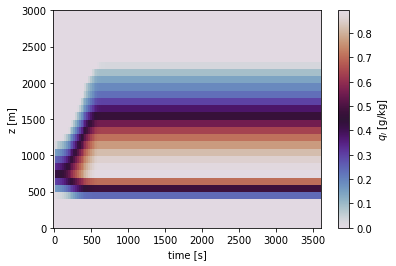

HTML(value="<a href='../utils/temporary_files/ql.pdf' target='_blank'>../utils/temporary_files/ql.pdf</a><br>"…

In [4]:
dt = output['t'][1] - output['t'][0]
dz = output['z'][1] - output['z'][0]
pyplot.pcolormesh(
    np.concatenate(((output['t'][0]-dt/2,), output['t']+dt/2)),
    np.concatenate(((output['z'][0]-dz/2,), output['z']+dz/2)),
    output['ql'],
    cmap='twilight'
)
pyplot.xlabel('time [s]')
pyplot.ylabel('z [m]')
cbar = pyplot.colorbar()
cbar.set_label('$q_l$ [g/kg]')
show_plot(filename='ql.pdf')